
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Tuesday, September 18 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 





One of the challenges mentions about solving the right problem, without realizing that it has already been solved.

This has happened many times in large organizations. One such case concerns a large American multinational information technology corporation.
Two team members working for Sales Analytics had a great idea in order to reduce costs to the company. They suggested building an algorithm which determines the need for exact number of sales specialists with subject matter expertise in European markets depending on the profitability of each market the organization caters to. This idea was greatly appreciated by their manager who immediately approved it, and the data scientists started working on this fantastic idea, only to be told a week later that this algorithm exists in an almost similar form in an entirely different team catering to the North American market. Because the organization is so large, and teams work in silos many times, it becomes extremely difficult to share the knowledge as well as products, even those that are very profitable. This is a very real example of re-inventing the wheel.

Another challenge mentions trying to solve the right problem with the wrong tools.

In the case of another major software organization, a leader in the field, their product data is a very valuable and sensitive resource. The team handling this data has to sign non-disclosure agreements and understand the repercussions of voluntarily or involuntarily sharing or disclosing this information. For this reason, the team cannot really use services like the cloud to process the data faster, and although they have powerful machines, it still means running queries on the large amounts of sensitive data and waiting a significant amount of time while the query executes and yields whatever insights the team is trying to pull. This means insufficient computing power affects the process detrimentally and ends up wasting a lot of time as well as effort, which could have been put to much better use.



# Question 2: Maximum likelihood estimate (10 pts)

Prove the statement on slide 3 of notes on MLR:
"Then minimizing Mean Squared Error (MSE) on the training data (which you can do using OLS) yields the Maximum Likelihood Estimate (MLE) solution of the assumed generative model."


## Answer


Underlying assumptions of OLS: 
1) resisuals are normally distributed
2) Errors of y are independent because y values are assumed to be independent

Any large dataset/random variables usually assumes a normal gaussian distribution ( Central limit theorem, law of large numbers) 


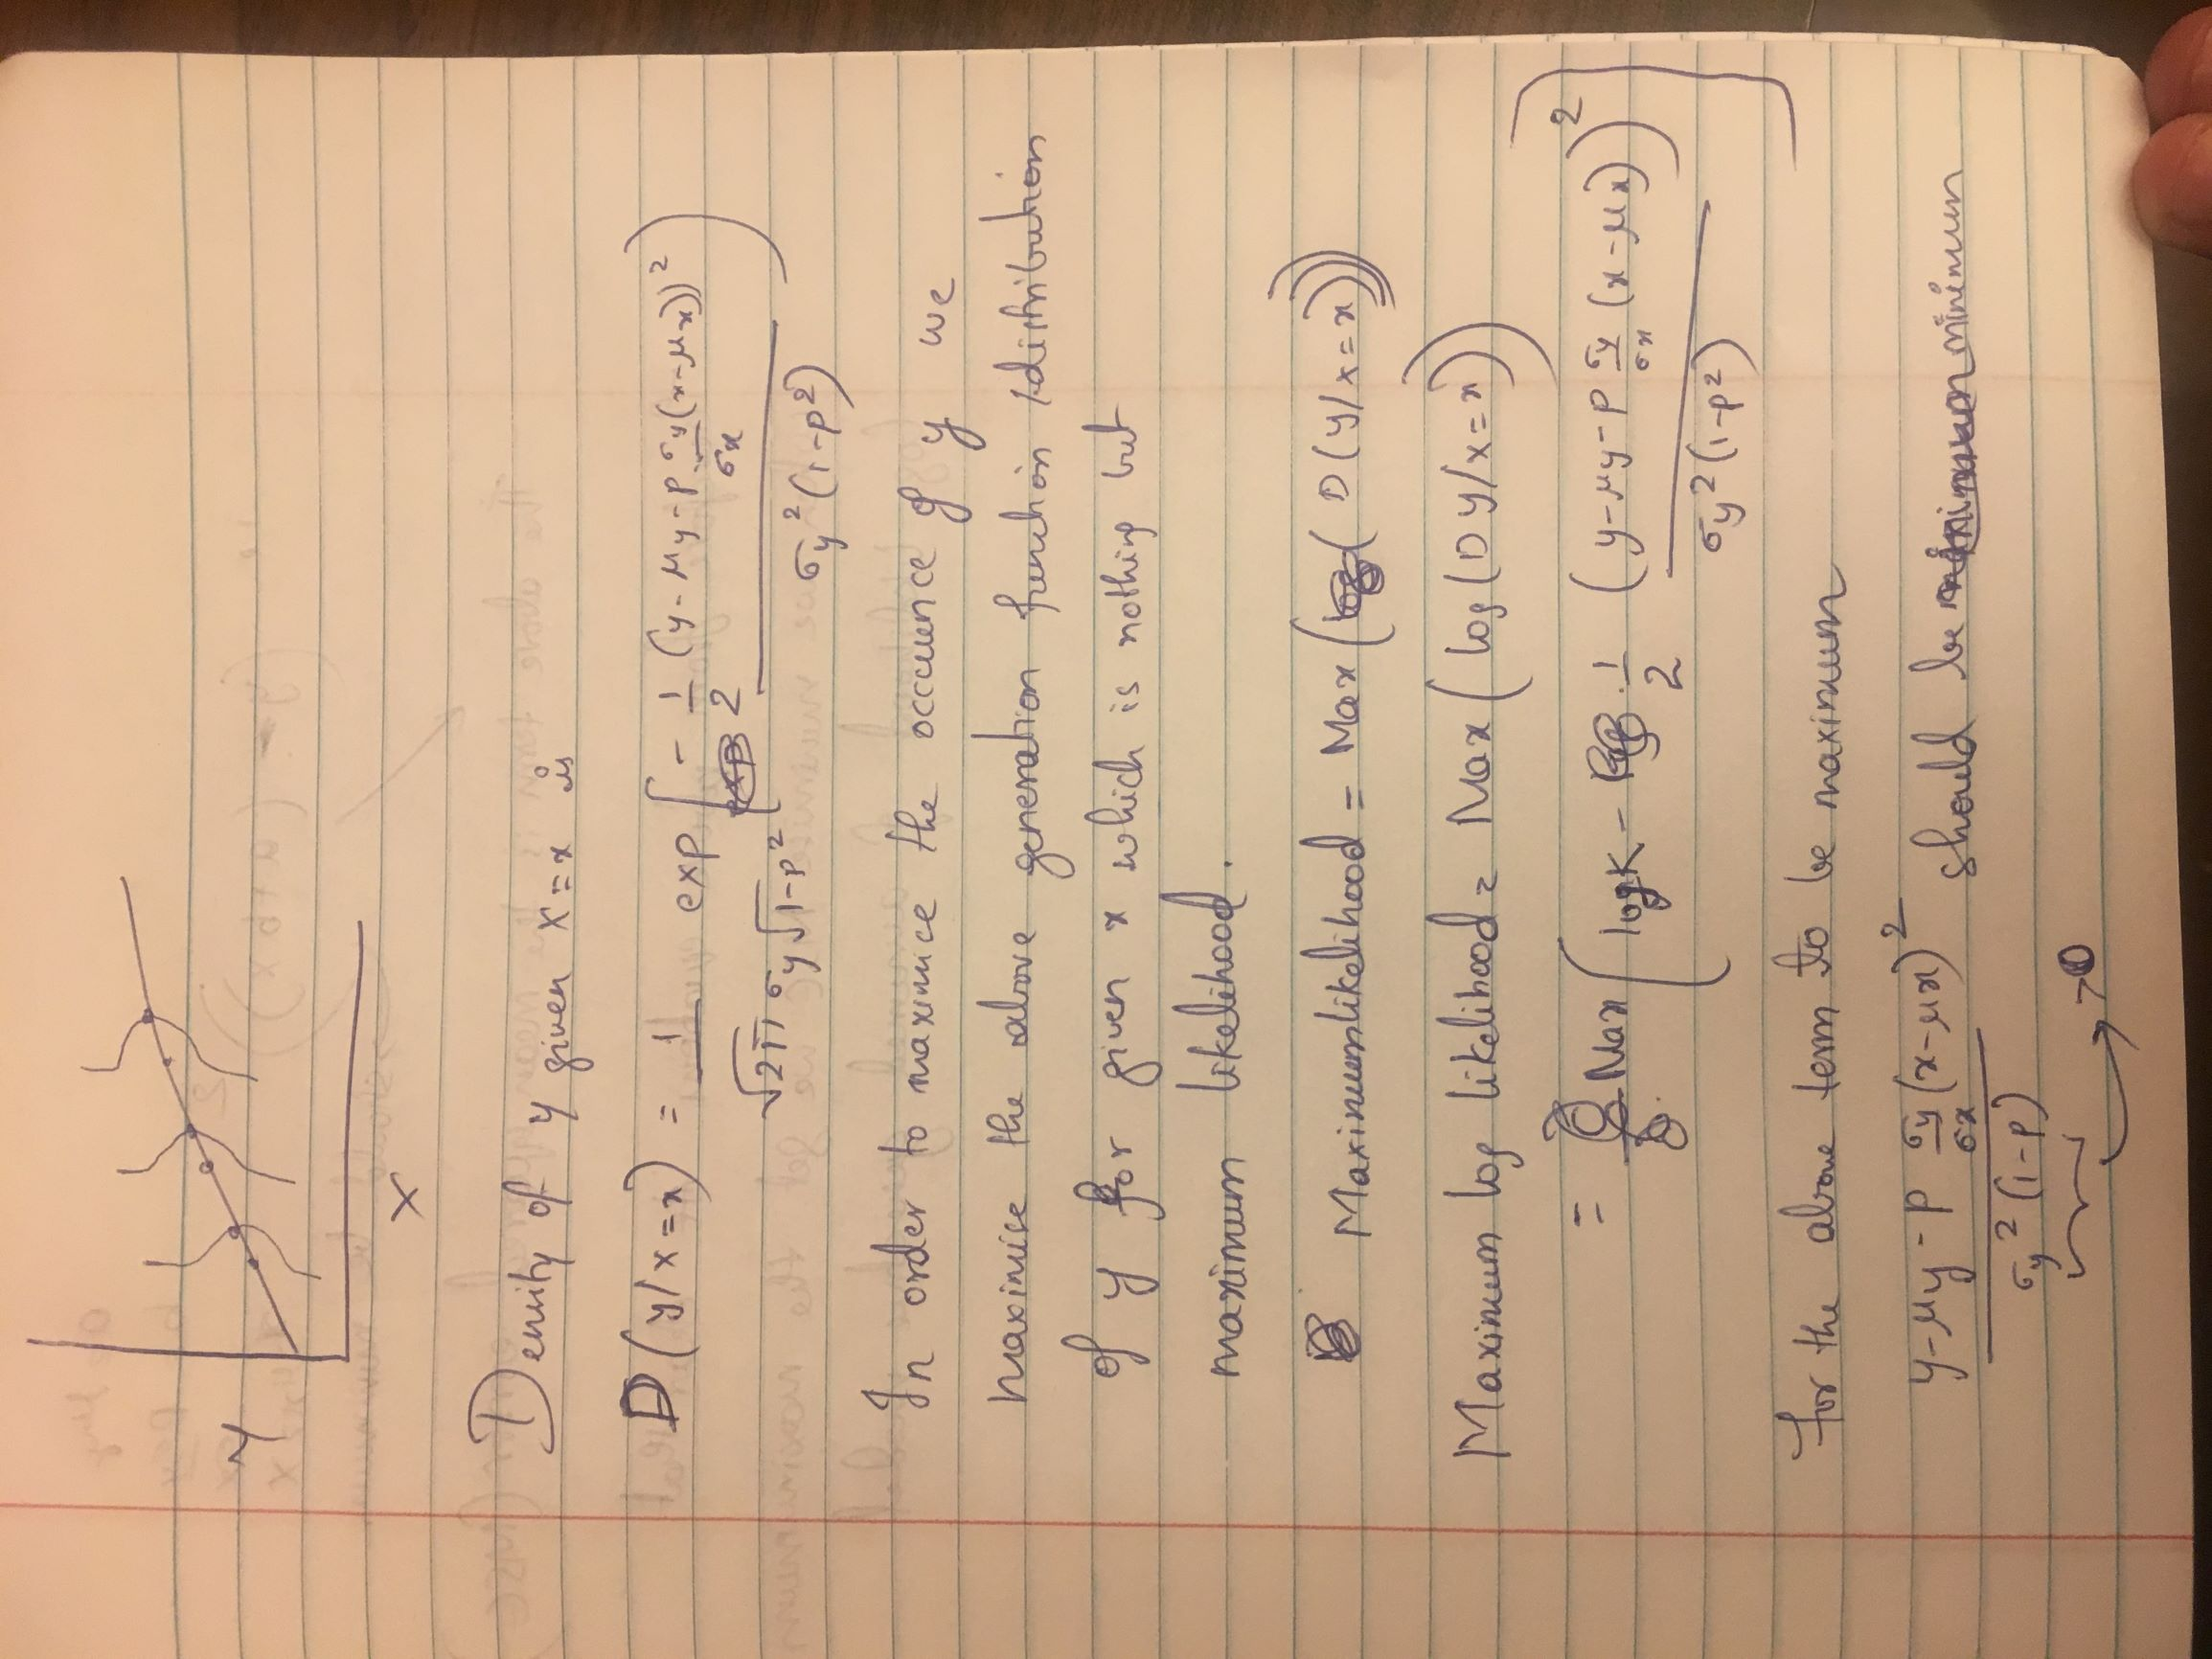

In [61]:
from IPython.display import Image
Image(filename='Q2_1.jpg')

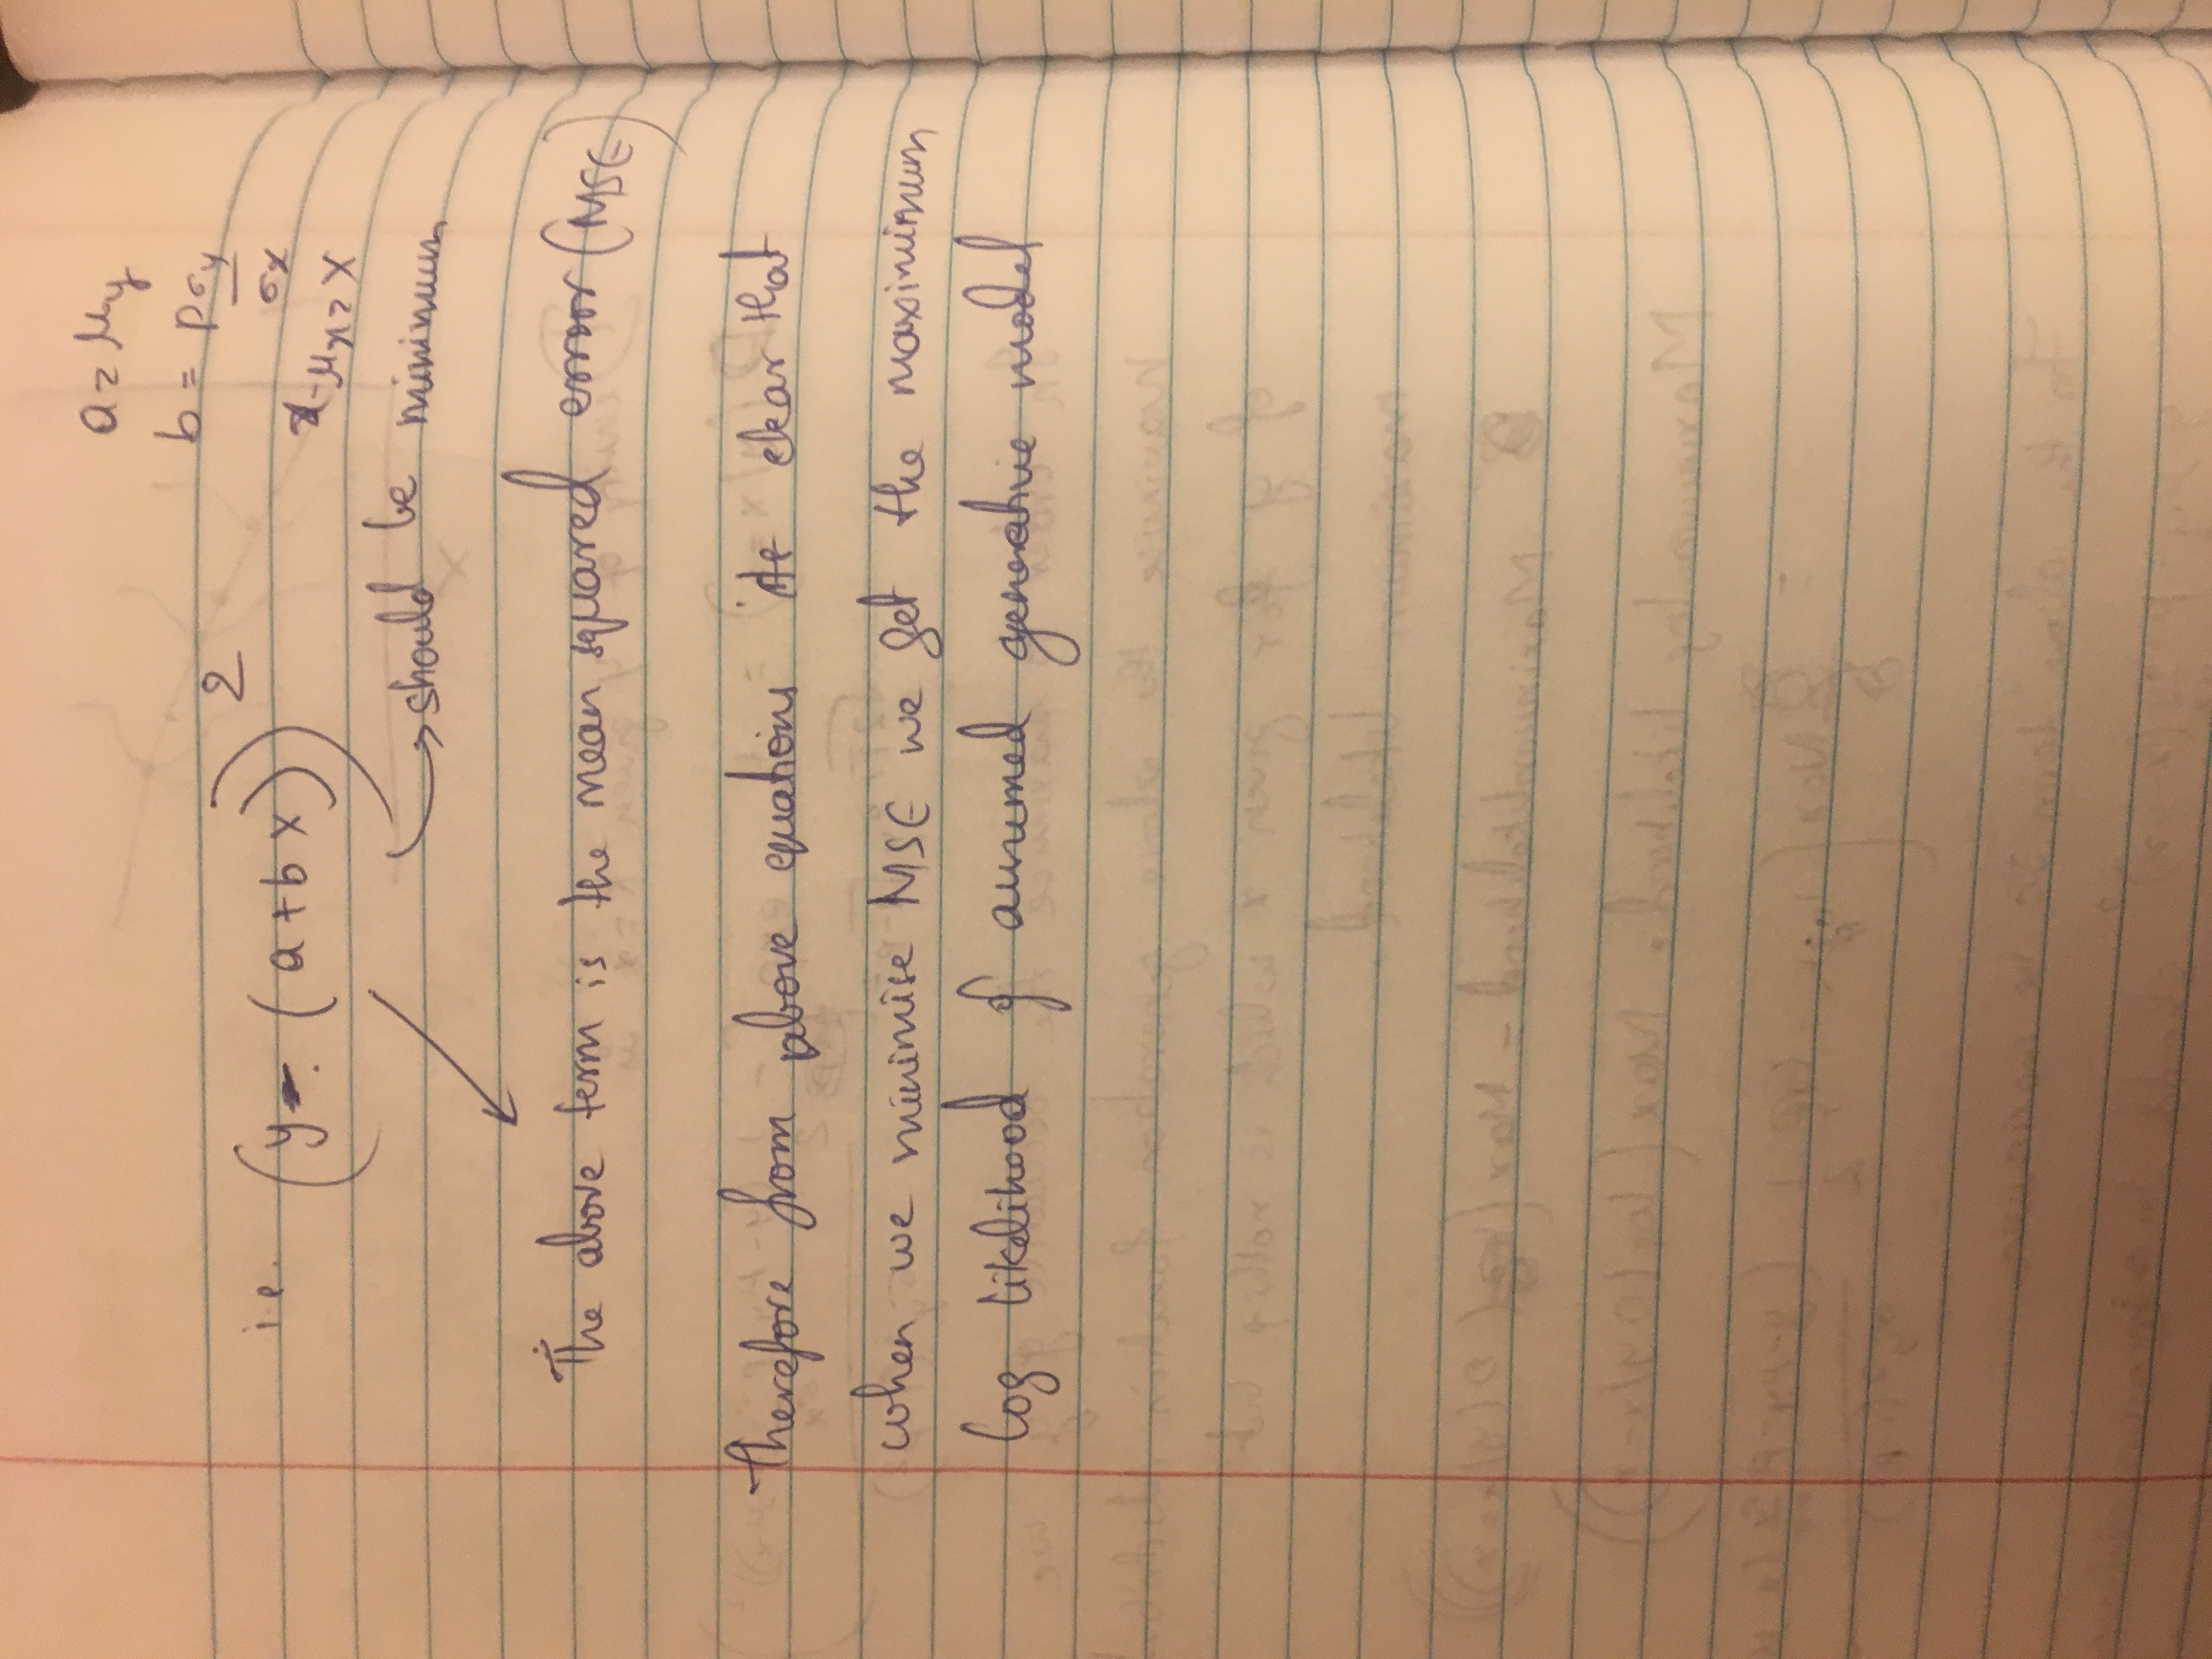

In [62]:
Image(filename='Q2.2.jpg')


# Question 3: Collinearity Issues (5 pts)

What is the “collinearity” issue encountered in MLR? Why is this a problem when you try to use MLR?
Suggest one way of addressing this problem.


## Answer

Collinearity: Dependence of Xs wrt each other. 
If Xs are uncorrelated, betas will be constant when you add more Xs. (beta is nothing but the partial derivative of y holding everything else constant). But in most of the real life cases, Xs are correlated, therefore  we notice the change in the betas when we add variables; resulting in increasing the standard errors which effects the reliability of betas.


Lets consider a MLR equation 
y= b0+ b1(x1) + b2(x2)
If x1 and x2 are perfectly correlated i.e.
x1=cx2 

==> K(x1-cx2)=0

y = b0 + (b1+K)x1 + (b2-cK)x2  is true for any K 


So we have infinite Ks that gives us the same result (zero trust) because of which the condifence interval shoots up to infinity and inflates the standard error. 

Standard errors are defined by the following formula:

s2bj=s2/variation in Xj not associated with other X’s= s2/ SSEj

SSEj= residual sum of squares when we regress Xj on all the other X’s 
SSEj is much lower if independent variables are highly correlated!

Addressing the collinearity problem:

1) Increase the number of samples(denominator in standard error) to reduce the standard error.
2) Find new predictors that are less correlated 
3) Principal Component Regression technique to an extent reduces the problem of collinearty by dimensionality reduction 
   (reduction in number of parameters characterizing the model) 
4) Regulatization techniques like Lasso and Ridge can be applied thereby penalising the coefficients. Lambda parameter keeps the    coefficents in check by keeping only one of the correlated Xs and discarding/minimising the coefficient of others.  



# Question 4: Multiple Linear Regression in Python (20 pts)

Use the following code to import the allstate-claims-severity dataset and linear models in python. The dataset is taken from https://www.kaggle.com/c/allstate-claims-severity I have removed the categorical variables to make it easier to run the models. Because of this, MAE (Mean absolute error) will be on higher end compared to other Kaggle entries. Please donwload the dataset "reduced_train.csv" and use it.



a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. The code for this is given below. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

d.  (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE. Explain the results.

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
train_df = pd.read_csv("reduced_train.csv")


X = train_df.drop(['id','loss'],axis=1)
Y = train_df['loss']

In [3]:
print "a) dimensions", X.shape
X.head()

a) dimensions (188318, 14)


cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0  0.726300  0.245921  0.187583  0.789639  0.310061  0.718367  0.335060   
1  0.330514  0.737068  0.592681  0.614134  0.885834  0.438917  0.436585   
2  0.261841  0.358319  0.484196  0.236924  0.397069  0.289648  0.315545   
3  0.321594  0.555782  0.527991  0.373816  0.422268  0.440945  0.391128   
4  0.273204  0.159990  0.527991  0.473202  0.704268  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606

In [4]:
model=linear_model.LinearRegression()
model.fit(X,Y)
print "b) coefficients"
print model.coef_
pred_Y= model.predict(X)
print " MAE",mean_absolute_error(Y,pred_Y, sample_weight=None, multioutput='uniform_average')

b) coefficients
[-2137.11121171  1762.2406163    -56.57968487  -301.1729806
    30.03201819  -557.22509919  1707.95520608   298.61240614
  2049.37910438  -250.01986129 -1732.34887444  2724.38985824
  -631.30128902   273.62600504]
 MAE 1950.3606265639835


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

In [6]:
model.fit(X_train,Y_train)
y_pred_train=model.predict(X_train)
print "c) Training set MAE" ,mean_absolute_error(Y_train,y_pred_train, sample_weight=None, multioutput='uniform_average')
y_pred_test=model.predict(X_test)
print "   Testing set MAE" ,mean_absolute_error(Y_test,y_pred_test, sample_weight=None, multioutput='uniform_average')

c) Training set MAE 1946.9866773014621
   Testing set MAE 1954.111059596165


As expected, the test set MAE is higher than train set MAE. But the difference is not too much in this case

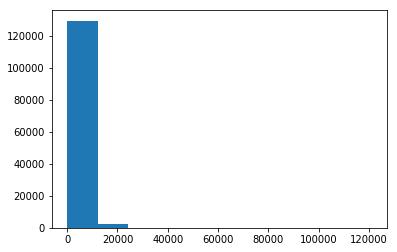

In [7]:
import matplotlib.pyplot as plt
plt.hist(Y_train)
plt.show()

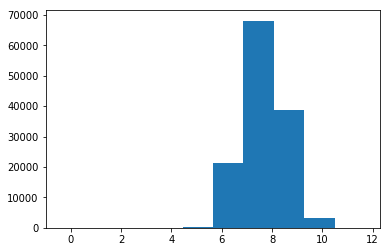

In [8]:
plt.hist(np.log(Y_train))
plt.show()

In [9]:
Y_train_ln=np.log(Y_train)
Y_test_ln=np.log(Y_test)

In [10]:
model.fit(X_train,Y_train_ln)
y_pred_train=np.exp(model.predict(X_train))
print "d) Training set MAE" ,mean_absolute_error(Y_train,y_pred_train, sample_weight=None, multioutput='uniform_average')
y_pred_test=np.exp(model.predict(X_test))
print "   Testing set MAE" ,mean_absolute_error(Y_test,y_pred_test, sample_weight=None, multioutput='uniform_average')

d) Training set MAE 1797.4369165421042
   Testing set MAE 1810.6519682594767


Y_train earlier was highly skewed (not normally distributed). By taking logarithm it can starighten out the skew(not completely though) so that it can be better fit the assumptions of a linear model thereby resulting in a better model. Hence we can see a drop in both train and test MAE.

# Question 5: Ridge and Lasso Regression (25 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. Take log of the Y_train and use it for training.

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-6}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-6,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

## Answer



Part 1

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

In [12]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

lasso = Lasso(random_state=0)
alphas = 10**np.linspace(10,-6,100)*0.5
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False, scoring= 'neg_mean_absolute_error')
clf.fit(X_train,Y_train_ln)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([5.00000e+09, 3.44631e+09, ..., 7.25414e-07, 5.00000e-07])}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

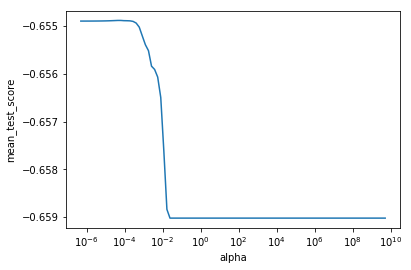

In [13]:
scores = clf.cv_results_['mean_test_score']
plt.semilogx(alphas, scores)
plt.ylabel('mean_test_score')
plt.xlabel('alpha')
plt.show()


In [14]:
best_alpha_lasso=clf.best_params_
best_alpha_lasso=best_alpha_lasso.values()[0]
best_alpha_lasso

6.309284415330092e-05

The optimal value for alpha in lasso would be 6.309284415330092e-05

In [15]:
ridge = Ridge(random_state=0)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

In [16]:
clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False,scoring= 'neg_mean_absolute_error')
clf.fit(X_train, Y_train_ln)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([5.00000e+09, 3.44631e+09, ..., 7.25414e-07, 5.00000e-07])}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

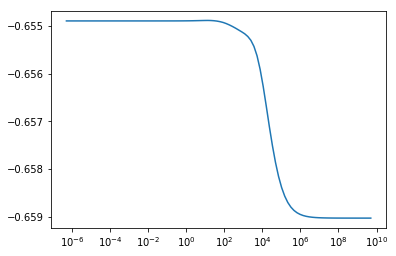

In [17]:
scores = clf.cv_results_['mean_test_score']
plt.semilogx(alphas, scores)
plt.show()

In [18]:
best_alpha_ridge=clf.best_params_
best_alpha_ridge=best_alpha_ridge.values()[0]
best_alpha_ridge

13.5929412136647

The optimal value for alpha in ridge would be 13.5929412136647

Part 2

In [19]:
clf = linear_model.Lasso(alpha=best_alpha_lasso)
clf.fit(X_train,Y_train_ln)
coefs = clf.coef_
print(coefs)

[-0.49411067  0.35457839  0.01457098 -0.08128999 -0.00900573 -0.04997096
  0.29599298  0.08930235  0.54860432 -0.17520767 -0.15076473  0.34786694
 -0.10019372  0.09411419]


In [20]:
alphas =10**np.linspace(10,-6,100)*0.5
coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, Y_train_ln)
    coefs.append(lasso.coef_)

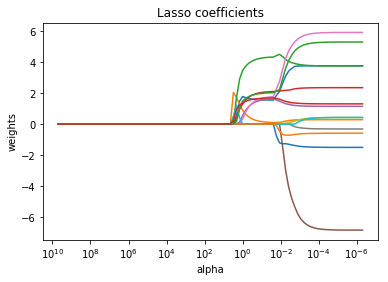

In [21]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients')
plt.axis('tight')
plt.show()



In [22]:
clf1 = linear_model.Ridge(alpha=best_alpha_ridge)
clf1.fit(X_train,Y_train_ln)
coefs1 = clf1.coef_
print(coefs1)

[-0.49315185  0.35614573  0.01478424 -0.08241959 -0.01081472 -0.06758035
  0.30449217  0.09158323  0.55105649 -0.17251372 -0.26572685  0.46426273
 -0.09595053  0.09483975]


In [23]:
alphas =10**np.linspace(10,-6,100)*0.5
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, Y_train_ln)
    coefs.append(ridge.coef_)


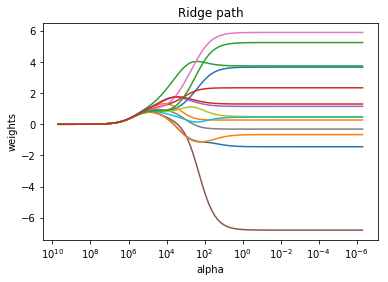

In [24]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge path')
plt.axis('tight')
plt.show()

Both in ridge and lasso regressions:

Alpha controls the size of coefficients. It is pretty evident from both the graphs that as alpha increases the weights(coefficients) are shrinking to 0.

(i)As alpha tends to infinity, i.e. betas shrink to 0 resulting in intercept only model as seen in the above figure.

(ii)As alpha tends to 0 we have the least squares solution. 

The difference between ridge and lasso:

In Ridge, every attribute has weight>0 but all small, in value, for large alphas.

In contrast when we look at the weights after lasso, we see a different pattern. At certain critical values of lambdas certain attribute features jump out of the model.




Part 3

In [25]:

clf = linear_model.Ridge(alpha=best_alpha_ridge)
clf.fit(X_train,Y_train_ln)

Ridge(alpha=13.5929412136647, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
Y_pred= np.exp(clf.predict(X_test))
mean_absolute_error(Y_test, Y_pred)

1810.6310418084493

In [27]:
clf1 = linear_model.Lasso(alpha=best_alpha_lasso)
clf1.fit(X_train,Y_train_ln)

Lasso(alpha=6.309284415330092e-05, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
Y_pred= np.exp(clf1.predict(X_test))
mean_absolute_error(Y_test, Y_pred)

1810.6424216634994

In [29]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train_ln)
Y_pred= np.exp(reg.predict(X_test))
mean_absolute_error(Y_test, Y_pred)

1810.6519682594767

Part 4

In [30]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(X_train, Y_train_ln)
lassocv.alpha_

1.742378003185893e-05

In [31]:
clf = linear_model.Lasso(alpha=1.742378003185893e-05)
clf.fit(X_train,Y_train_ln)
coefs = clf.coef_
print(coefs)

[-0.51711206  0.35693216  0.01261526 -0.08068485 -0.00950437 -0.06881325
  0.30609698  0.08840324  0.57216477 -0.16869083 -0.35348216  0.55420528
 -0.09951851  0.09436384]


# Question 6 (10pts)

Please solve problem \#3.3 on page 174 in Bishop (Chapter 3). The problem has been uploaded to Canvas under 'Files': **CH3 problems from Bishop PRML.pdf**.

## Answer

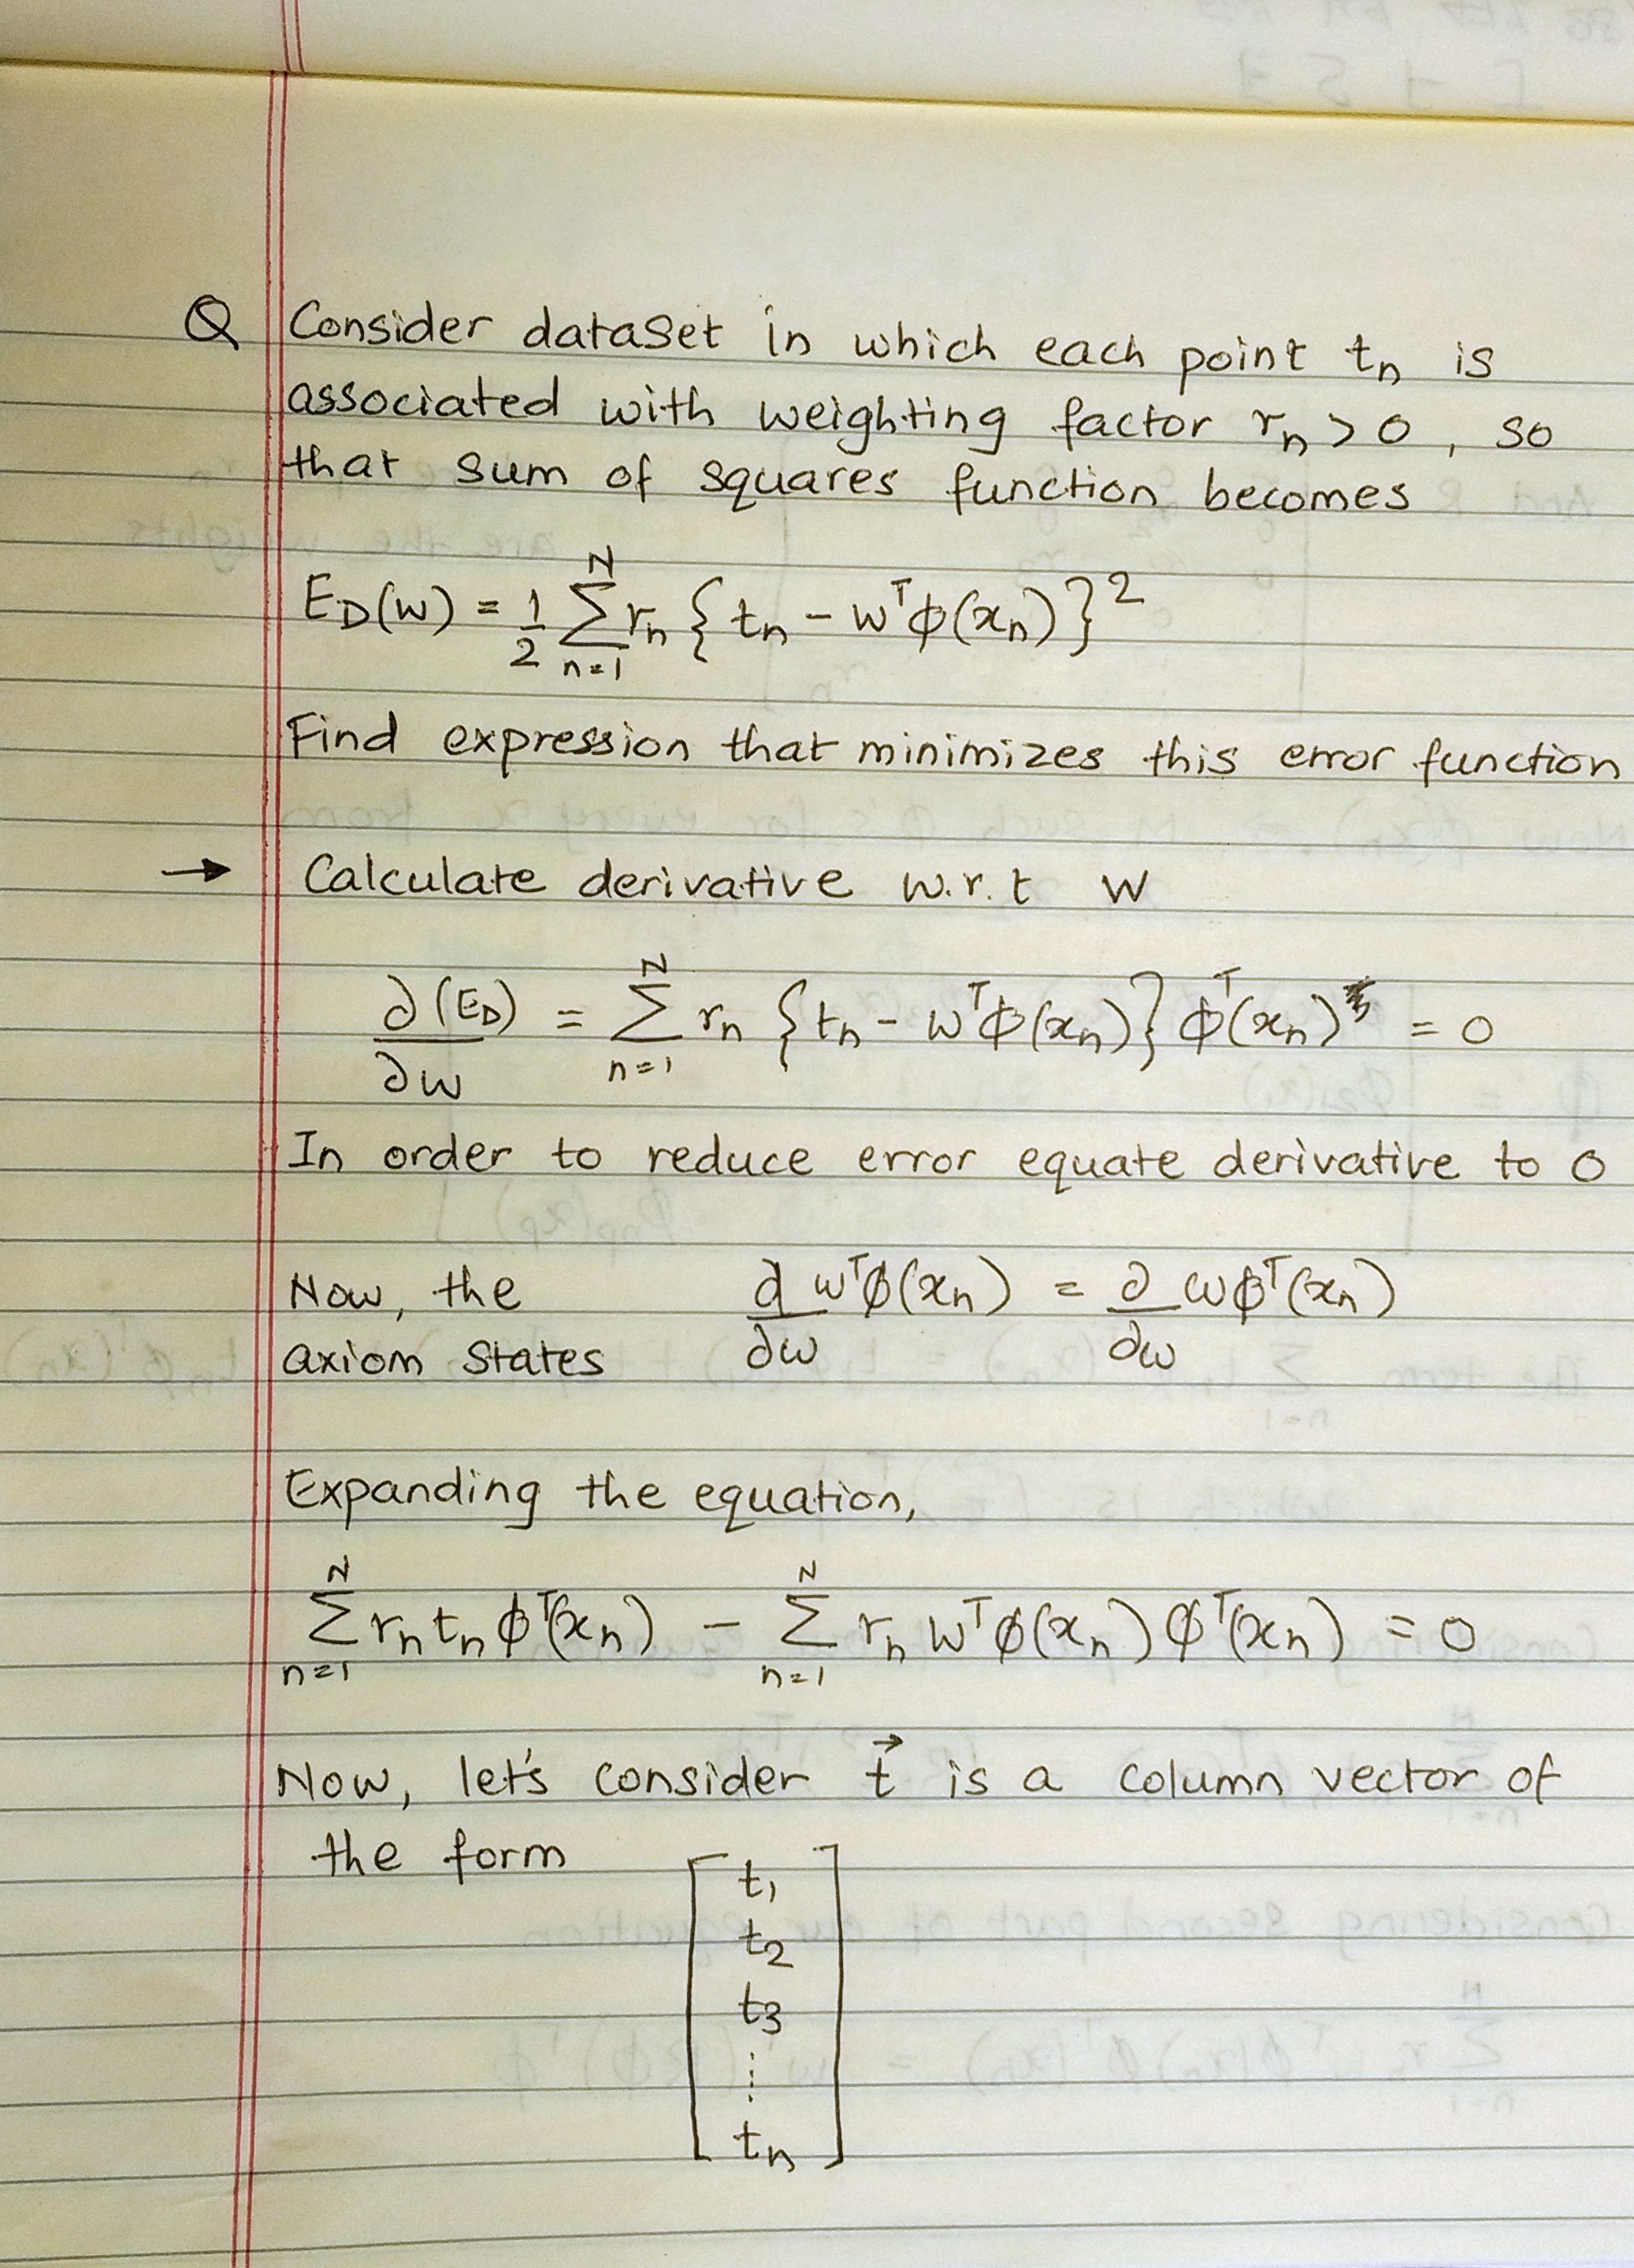

In [32]:
from IPython.display import Image
Image(filename='Part-1.jpg') 


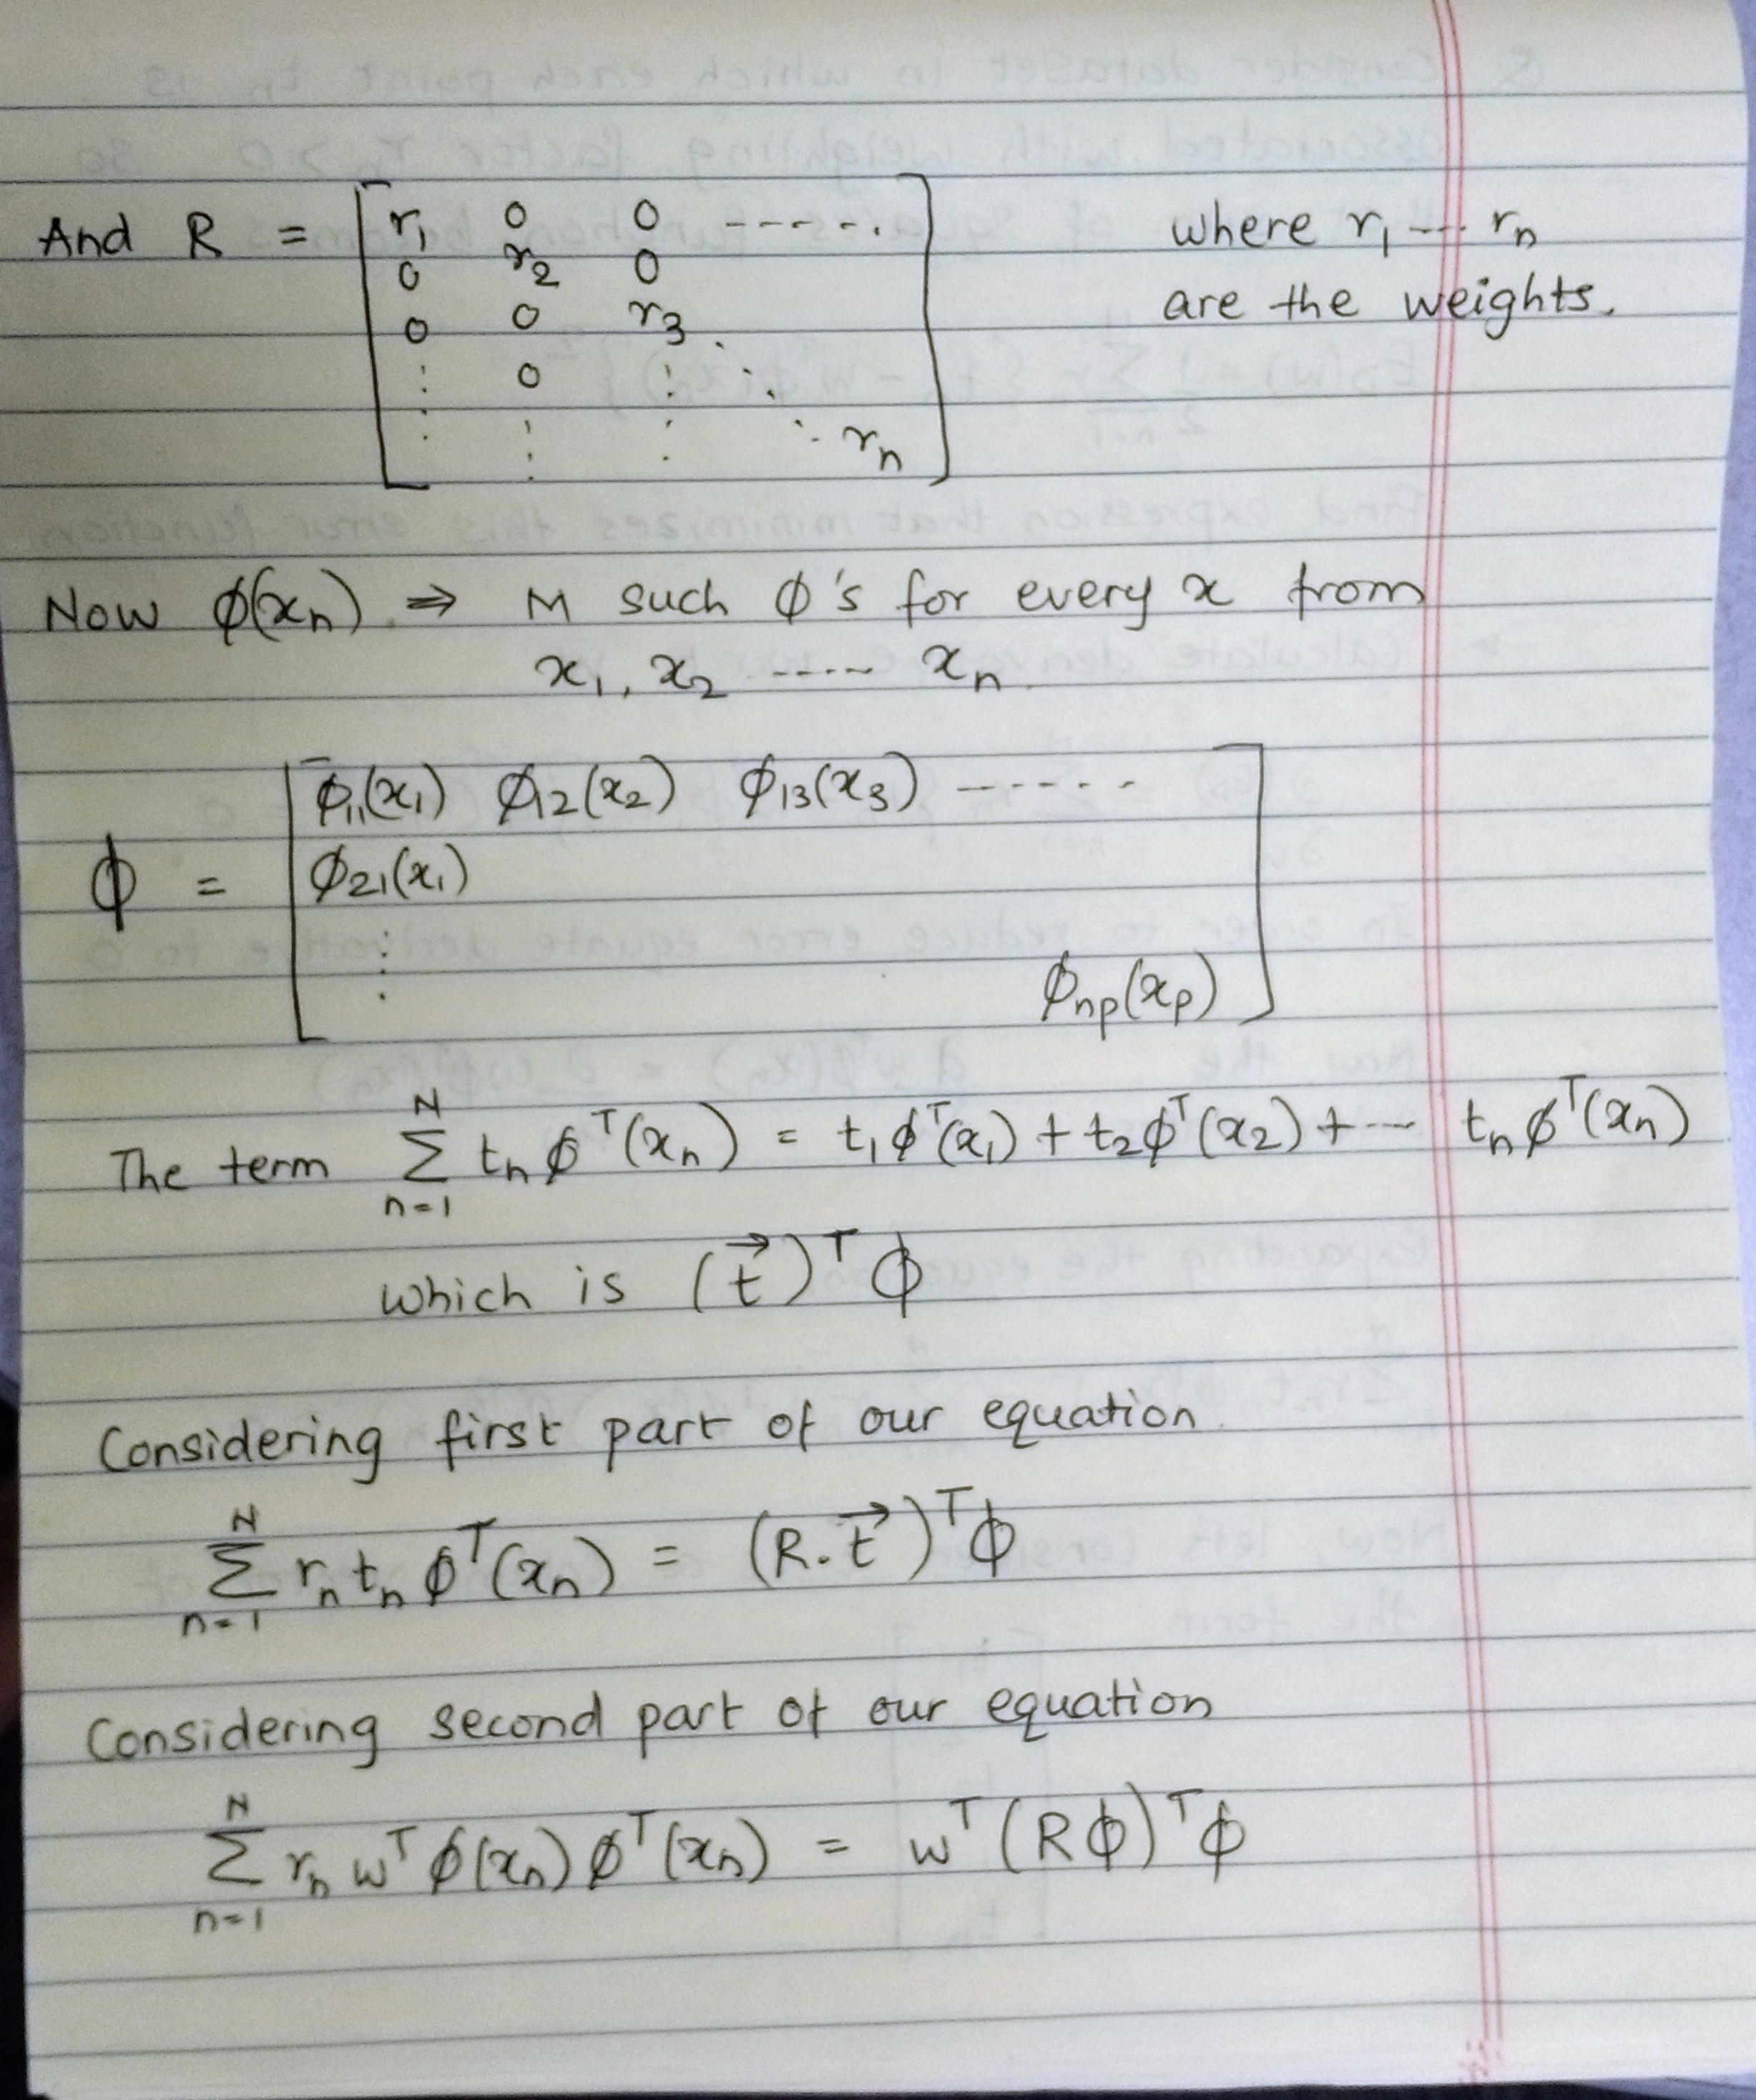

In [33]:
Image(filename='Part-2.jpg') 

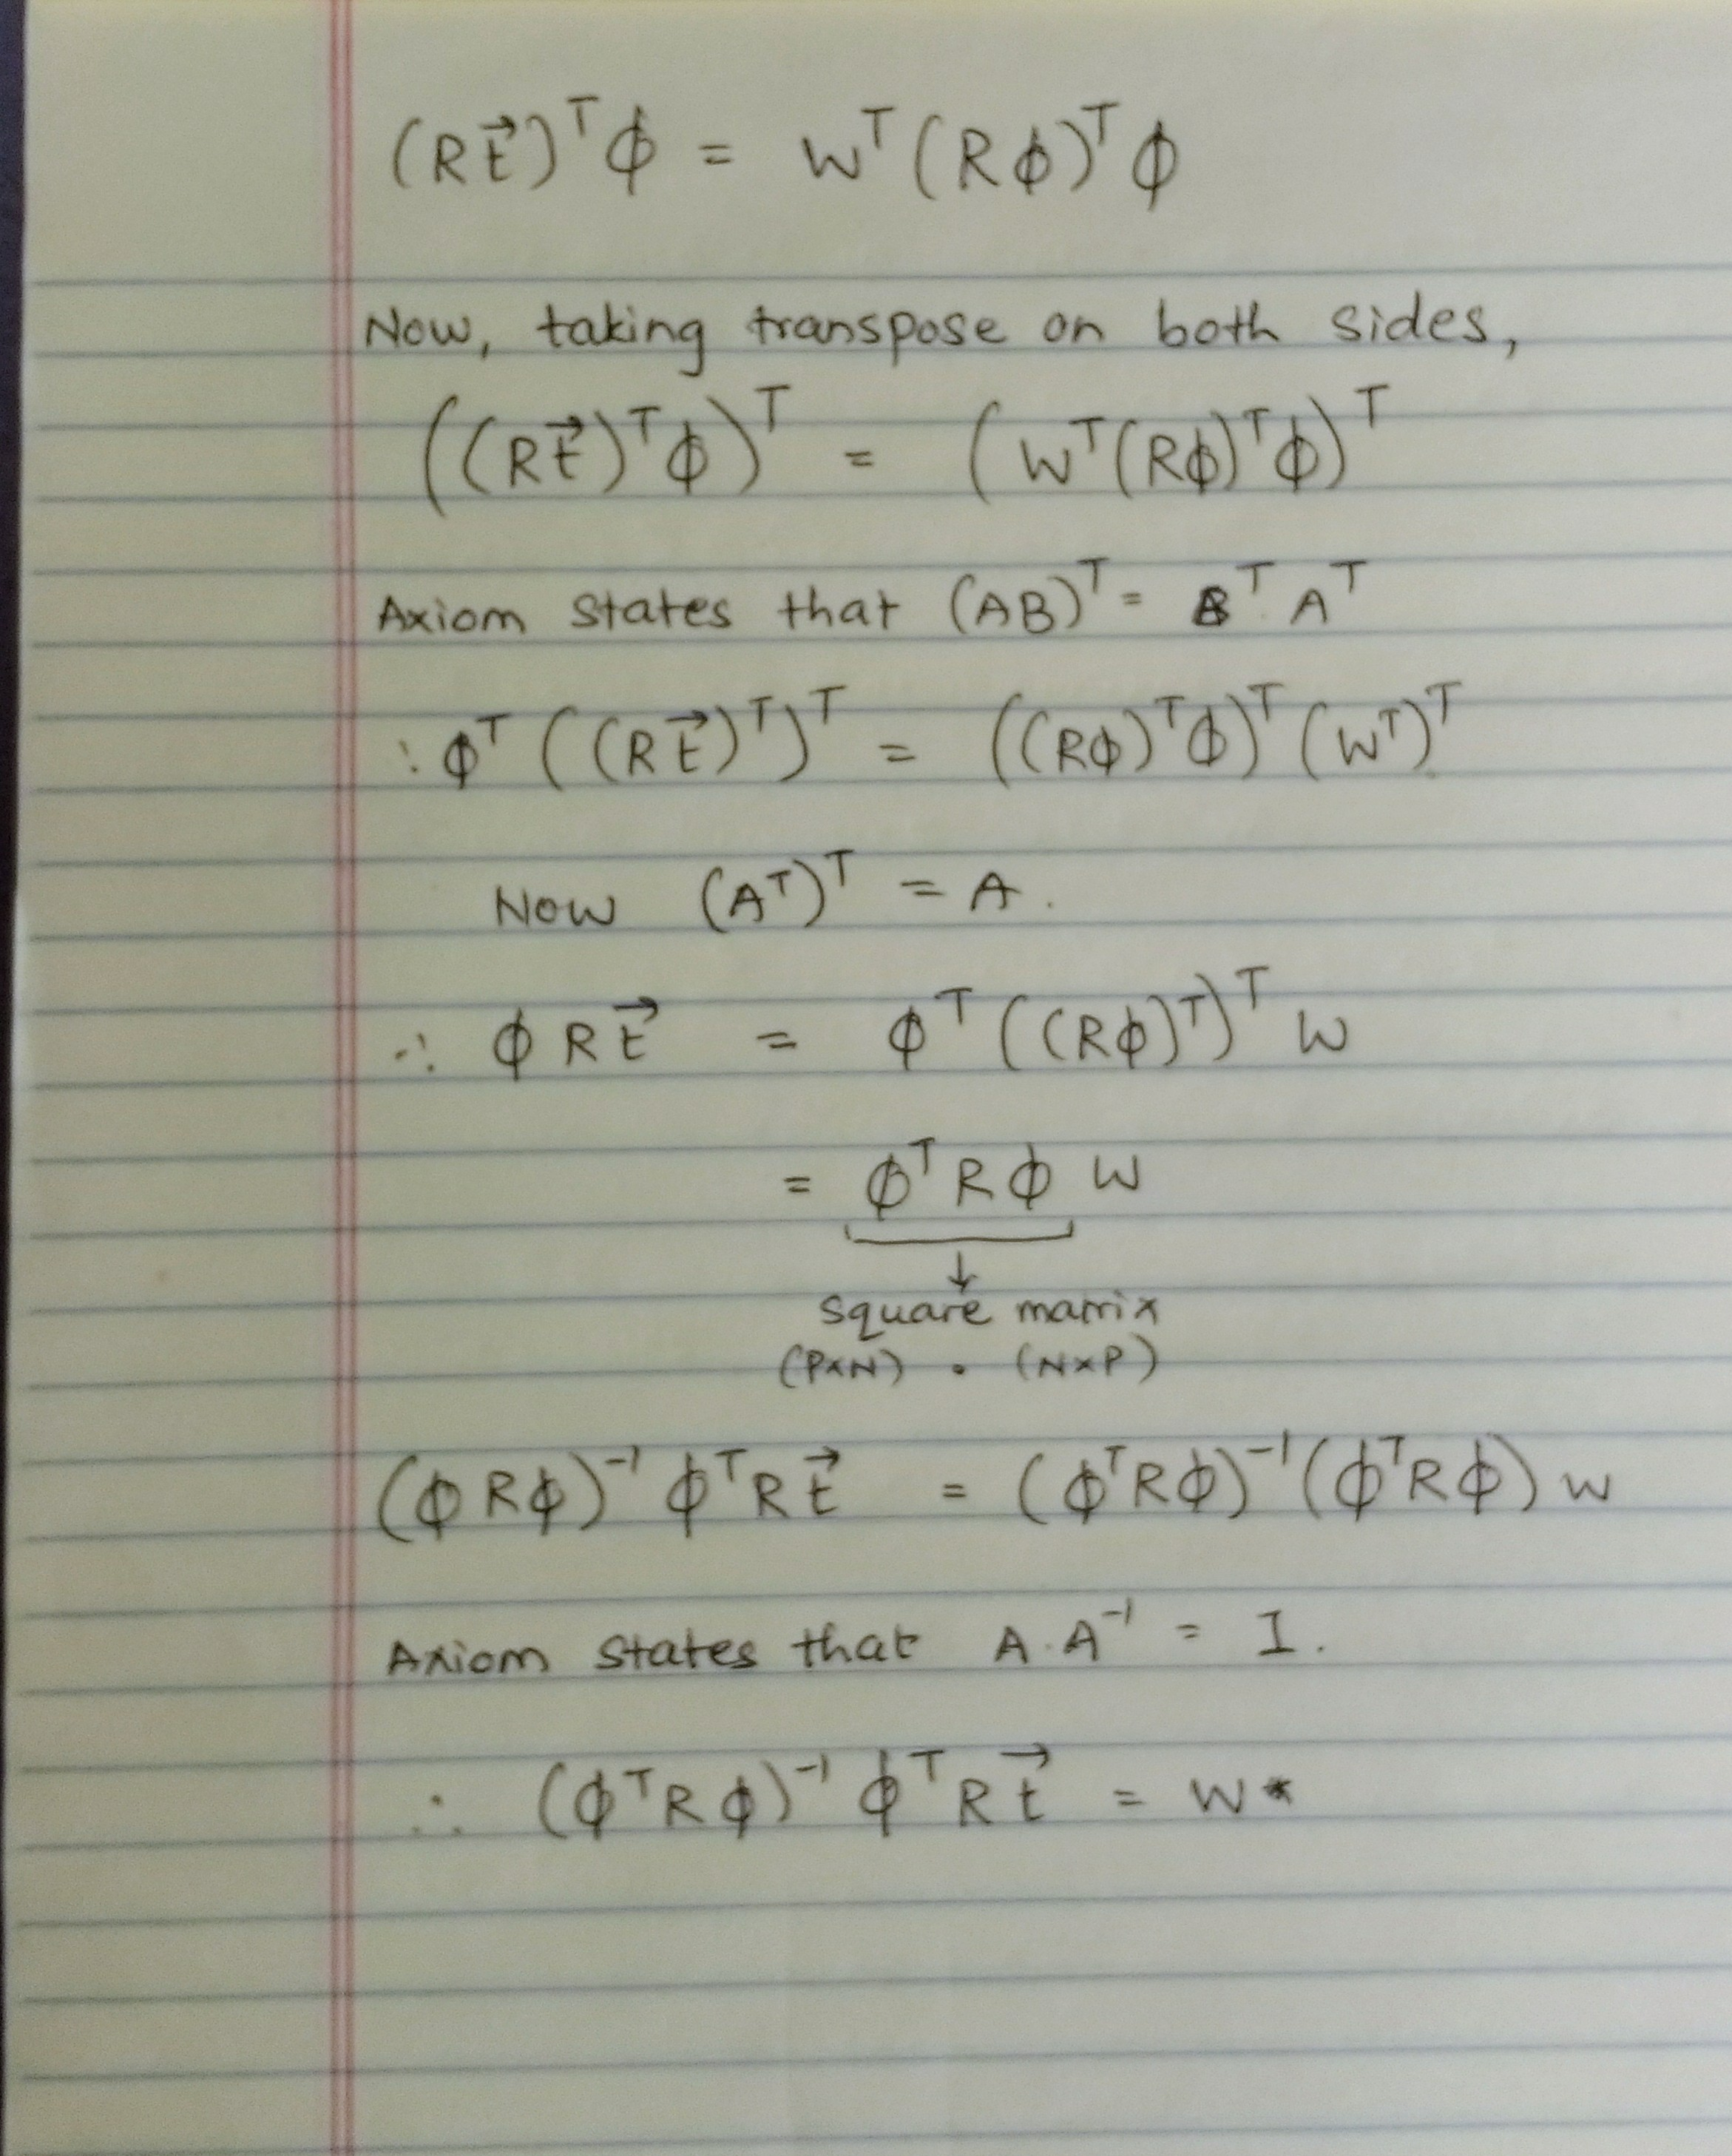

In [34]:
Image(filename='Part-3.jpg') 

Weighted sum-of-squares error function 

One of the common assumptions of most models is that each data point contributes the same to the prediction/fitting of model 
and standard deviation of error term is constant across all the values of the predictor variables. This is almost always violated in practical implementation. 

The noise of variance is not constant. In the model where best fit is determined based on weighted sum-of-squares error, less fit is given to the less precise measurements and more weight to more precise measurements when training the model. Setting weights(r) that are inversely proportional to the variance at each level gives us better fitted model. This way we are trying to  fit well where the noise is small and compromise on the fit where the noise is big.

Each term in the weighted sqaures in terms of replicated data points includes an additional weight that determines how much each observation in the dataset influences the final parameter. So weighting the sum of squares in terms of replicated data points  significantly improves the ability of least squares method to fit the data.






